In [15]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv
/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv


In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
# Load data
shopTrends = pd.read_csv('/kaggle/input/customer-shopping-trends-dataset/shopping_trends.csv')
shopTrendsUp = pd.read_csv('/kaggle/input/customer-shopping-trends-dataset/shopping_trends_updated.csv')

In [18]:
shopTrends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


# Visualizando la distribución de los datos numericos

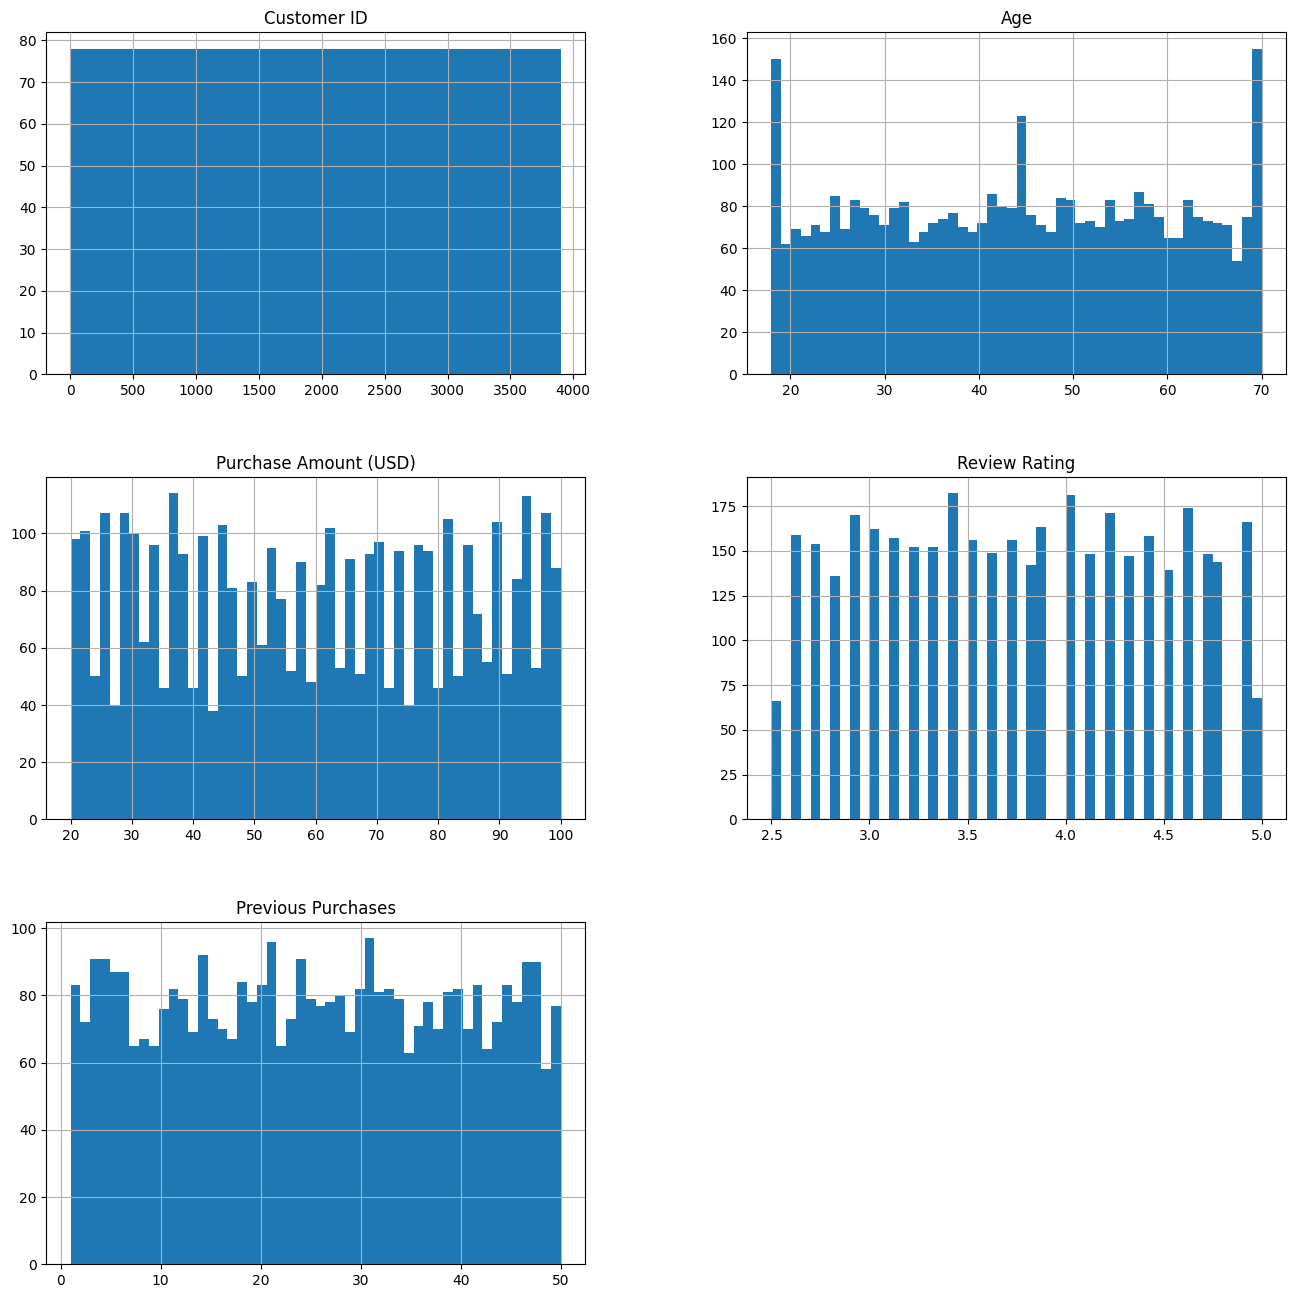

In [19]:
# Chart overview
shopTrends.hist(bins=50, figsize=(16,16))
plt.show()

--- 
Ahora vamos a agrupar en rangos de edad para poder visualizar que productos compran mas frecuentemente segun los rangos de edad definidos
---

In [20]:
bins = [15,25,35,45,55,65,100]
labels = ['15-25','26-35','36-45','46-55','56-65','66-100']
shopTrends['AgeRange'] = pd.cut(shopTrends['Age'],bins, labels=labels)

In [21]:
shopTrends.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases,AgeRange
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly,46-55
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly,15-25
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly,46-55
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly,15-25
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually,36-45


In [22]:
# Agrupar y contar los datos con el parámetro observed
age_category_counts = shopTrends.groupby(['AgeRange', 'Category'], observed=True).size().reset_index(name='Count')

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_

<Figure size 1200x800 with 0 Axes>

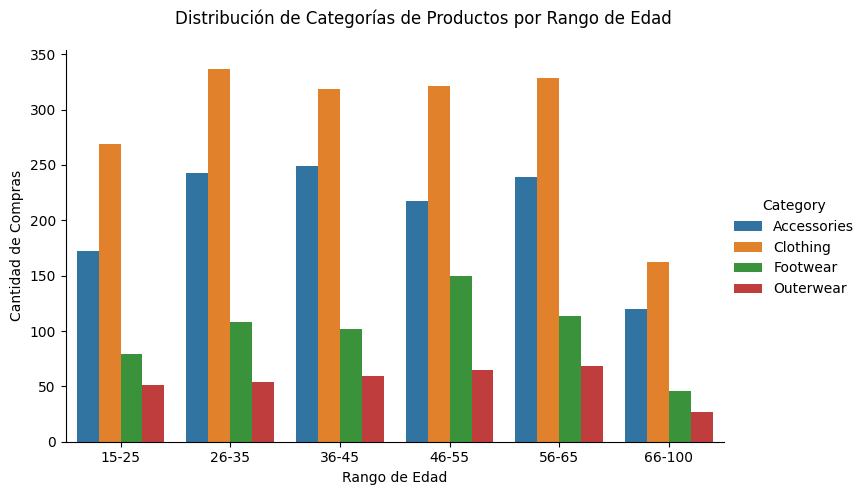

In [23]:
plt.figure(figsize=(12, 8))
sns.catplot(data=age_category_counts, x='AgeRange', y='Count', hue='Category', kind='bar', height=5, aspect=1.5)
plt.subplots_adjust(top=0.9)
plt.suptitle('Distribución de Categorías de Productos por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('Cantidad de Compras')
plt.show()

In [24]:
gender_category_counts = shopTrends.groupby(['Gender','Category'], observed=True).size().reset_index(name='Count')

<Figure size 1200x800 with 0 Axes>

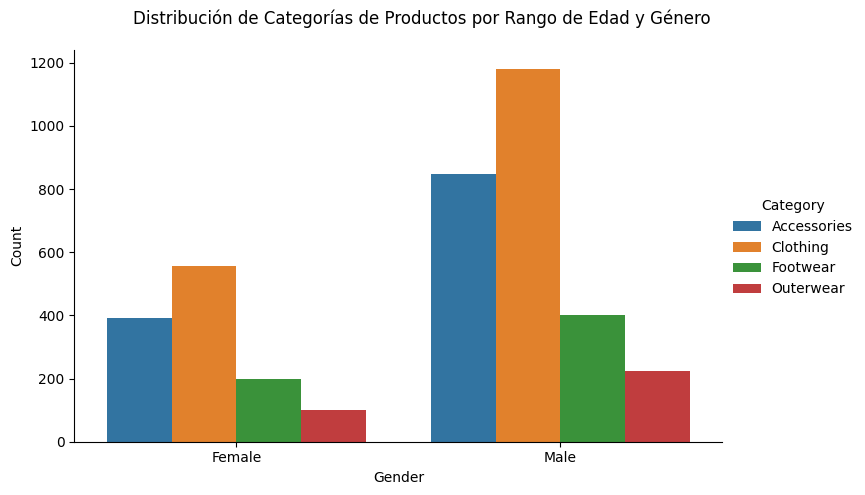

In [25]:
plt.figure(figsize=(12, 8))
sns.catplot(data=gender_category_counts, x='Gender', y='Count', hue='Category', kind='bar', height=5, aspect=1.5)
plt.subplots_adjust(top=0.9)
plt.suptitle('Distribución de Categorías de Productos por Rango de Edad y Género')
plt.show()

---
Como se puede ver hay una gran cantidad de datos de hombre, vamos a confirmar cuantos datos se tienen de ambos generos
---

In [26]:
gender_counts = shopTrends.groupby(['Gender'], observed=True).size().reset_index(name='Count')
gender_counts.head()

,Gender,Count
0,Female,1248
1,Male,2652
